In [5]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

c = 2.9979e10 #speed of light
G = 6.6726e-8 #Gravitational constant in cgs
m_sol = 1.989e33 #Solar mass in grams
rad_arcs = 206264.806 #Conversion factor for going from radians to arcseconds

src = np.genfromtxt('../../run15/back_projected_sources.dat', dtype=(
    {'names': ['tag', 'x', 'y', 'z','mult'], 'formats': ['f8', 'f8', 'f8', 'f8','i4']}))
src_im = np.genfromtxt('../../run15/back_projected_sources_allim.dat', dtype=(
    {'names': ['tag', 'x', 'y'], 'formats': ['f8', 'f8', 'f8']}))


N = len(src['x']) #Number of images

mult=src['mult']
print(mult)

[3 3 3 5 3 5 3 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2
 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2]


In [18]:
m=[0 for n in range(N+1)]
std=[0 for n in range(N)]
m[0]=0

for j in range(N):
    m[j+1]=mult[j]+m[j]
    std_x,std_y=0.,0.
    for i in range(m[j],m[j+1]):
        std_x+=6*np.sqrt(abs(src['x'][j]-src_im['x'][i])**2)/mult[j]
        std_y+=6*np.sqrt(abs(src['y'][j]-src_im['y'][i])**2)/mult[j]
        print(src['x'][j],src_im['x'][i],std_x,mult[j])
    std[j]=np.sqrt(std_x**2+std_y**2)
# print(std)

    

0.561571 0.563966 0.00478999999999985 3
0.561571 0.559789 0.008353999999999973 3
0.561571 0.560958 0.009580000000000144 3
0.645708 0.649508 0.007600000000000051 3
0.645708 0.646287 0.008758000000000044 3
0.645708 0.641328 0.017517999999999923 3
1.427637 1.423485 0.008304000000000311 3
1.427637 1.423738 0.016102000000000505 3
1.427637 1.435689 0.0322060000000004 3
-0.264287 -0.262728 0.0018707999999999724 5
-0.264287 -0.259778 0.007281599999999954 5
-0.264287 -0.262907 0.008937599999999945 5
-0.264287 -0.269725 0.015463199999999943 5
-0.264287 -0.266298 0.017876399999999924 5
-1.79674 -1.795244 0.0029919999999998836 3
-1.79674 -1.789716 0.017039999999999722 3
-1.79674 -1.805259 0.03407799999999961 3
1.337173 1.331658 0.006617999999999924 5
1.337173 1.344851 0.015831600000000015 5
1.337173 1.338182 0.01704240000000006 5
1.337173 1.337998 0.018032400000000153 5
1.337173 1.333175 0.022830000000000086 5
3.480038 3.474761 0.010553999999999952 3
3.480038 3.480276 0.011029999999999873 3
3.4800

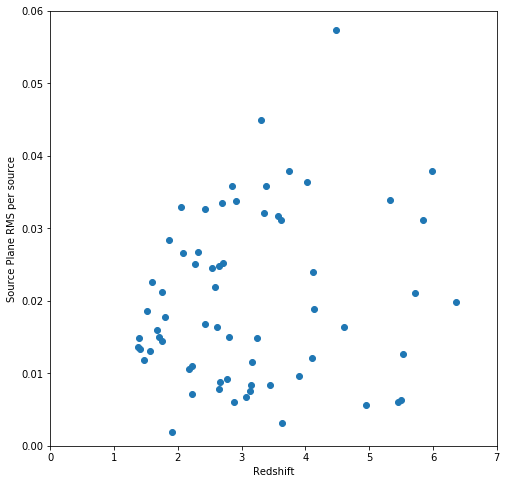

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(src['z'],std)
plt.xlabel("Redshift")
plt.ylabel("Source Plane RMS per source")
plt.axis([0,7,0,0.060])
plt.show()